In [1]:
import time
start = time.perf_counter()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

## 19.3 Basic forecasting with Prophet 

In [4]:
df = pd.read_csv('../data/daily_min_temp.csv')

df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


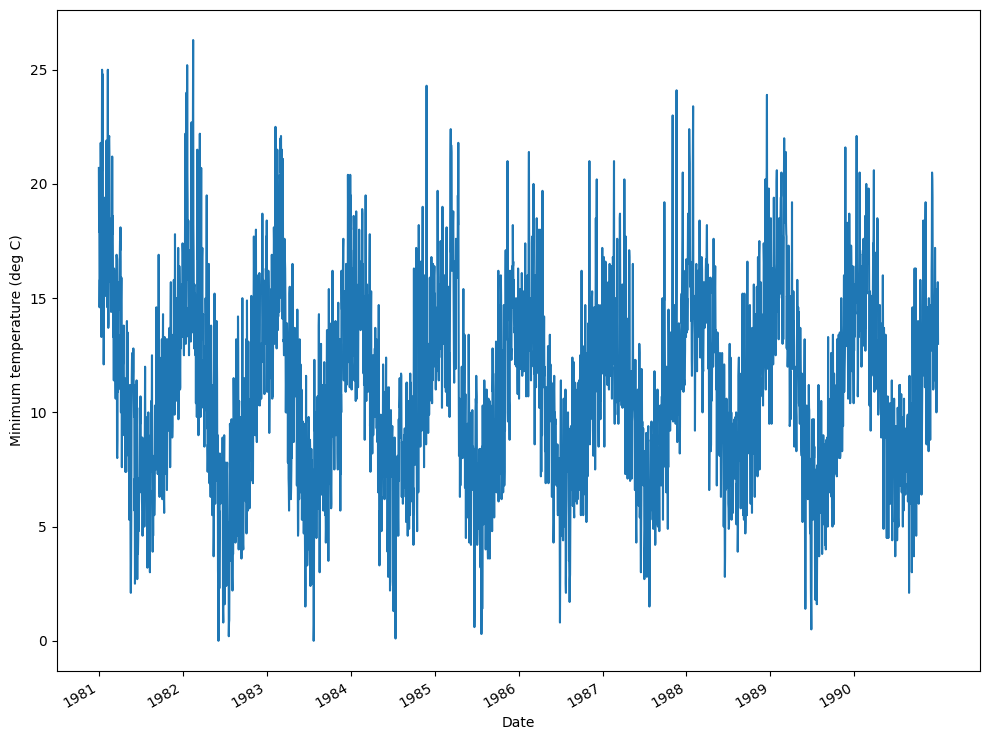

In [6]:
fig, ax = plt.subplots()

ax.plot(df['Temp'])
ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

plt.xticks(np.arange(0, 3649, 365), np.arange(1981, 1991, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F01_peixeiro.png', dpi=300)

## Basic forecasting with Prophet

In [7]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
train = df[:-365]
test = df[-365:]

In [9]:
m = Prophet()

In [10]:
m.fit(train);

01:22:46 - cmdstanpy - INFO - Chain [1] start processing
01:22:46 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365)

In [12]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.878402,11.287249,18.550886
3286,1990-01-02,15.004771,11.421706,18.431309
3287,1990-01-03,15.081115,11.557461,18.389801
3288,1990-01-04,14.989117,11.575080,18.502518
3289,1990-01-05,15.059325,11.651927,18.444881


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3645,1990-12-27,11.395746,10.876408,18.093614,11.302298,11.499817,3.043862,3.043862,3.043862,-0.026446,-0.026446,-0.026446,3.070307,3.070307,3.070307,0.0,0.0,0.0,14.439608
3646,1990-12-28,11.395648,10.772108,18.363987,11.301841,11.500007,3.121133,3.121133,3.121133,-0.009965,-0.009965,-0.009965,3.131099,3.131099,3.131099,0.0,0.0,0.0,14.516781
3647,1990-12-29,11.395549,11.252257,18.131011,11.301439,11.500182,3.145136,3.145136,3.145136,-0.048857,-0.048857,-0.048857,3.193993,3.193993,3.193993,0.0,0.0,0.0,14.540685
3648,1990-12-30,11.395450,10.958112,18.142201,11.300893,11.500357,3.069536,3.069536,3.069536,-0.188702,-0.188702,-0.188702,3.258238,3.258238,3.258238,0.0,0.0,0.0,14.464986
3649,1990-12-31,11.395351,11.152495,18.621448,11.299883,11.500531,3.366681,3.366681,3.366681,0.043660,0.043660,0.043660,3.323021,3.323021,3.323021,0.0,0.0,0.0,14.762032


In [14]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.8,14.878402,11.287249,18.550886
3286,1990-01-02,13.3,15.004771,11.421706,18.431309
3287,1990-01-03,15.6,15.081115,11.557461,18.389801
3288,1990-01-04,14.5,14.989117,11.575080,18.502518
3289,1990-01-05,14.3,15.059325,11.651927,18.444881


In [15]:
test['baseline'] = train['y'][-365:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
3285,1990-01-01,14.8,14.878402,11.287249,18.550886,14.3
3286,1990-01-02,13.3,15.004771,11.421706,18.431309,17.4
3287,1990-01-03,15.6,15.081115,11.557461,18.389801,18.5
3288,1990-01-04,14.5,14.989117,11.575080,18.502518,16.8
3289,1990-01-05,14.3,15.059325,11.651927,18.444881,11.5


In [16]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

1.9377517408588287
2.8673972602739726


In [17]:
test.iloc[59]

ds            1990-03-01
y                   19.3
yhat           15.461733
yhat_lower     12.051453
yhat_upper     18.977685
baseline            20.4
Name: 3344, dtype: object

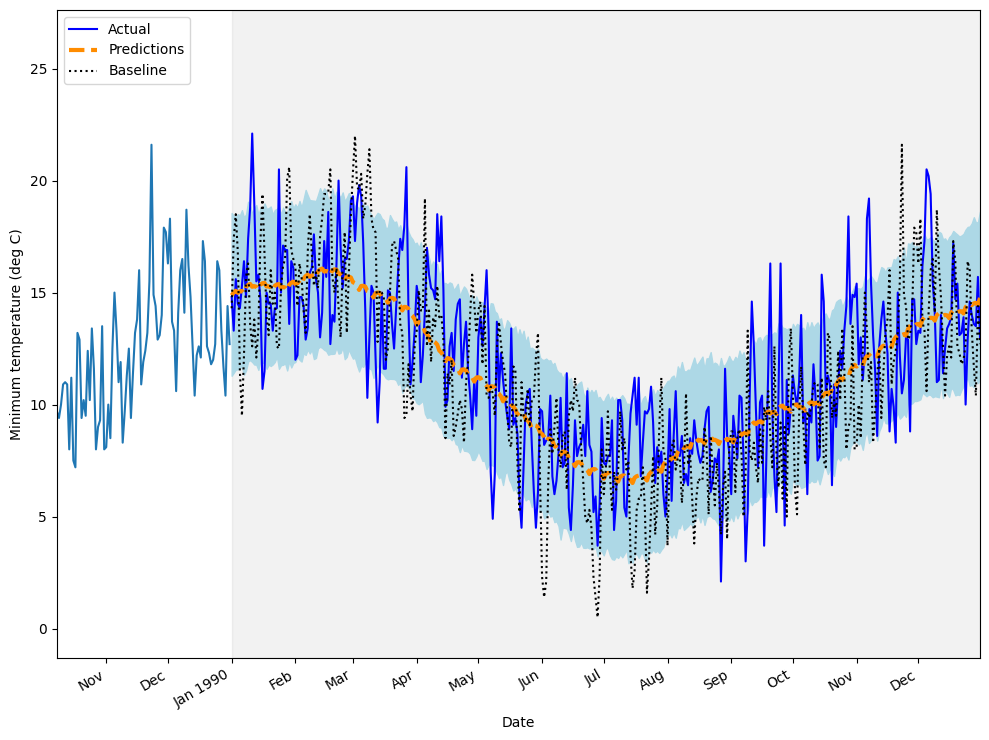

In [18]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

ax.axvspan(3285, 3649, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(
    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(3200, 3649)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F03_peixeiro.png', dpi=300)

## 19.4 Exploring Prophet's advanced functionalities

### 19.4.1 Visualization capabilities

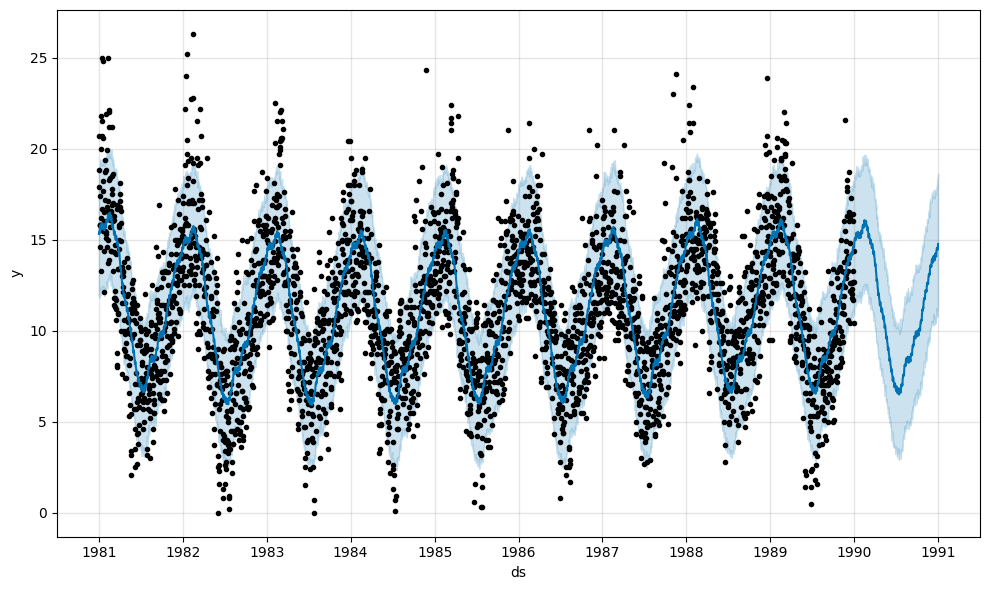

In [19]:
fig1 = m.plot(forecast)

plt.savefig('figures/CH19_F04_peixeiro.png', dpi=300)

#### Plot components 

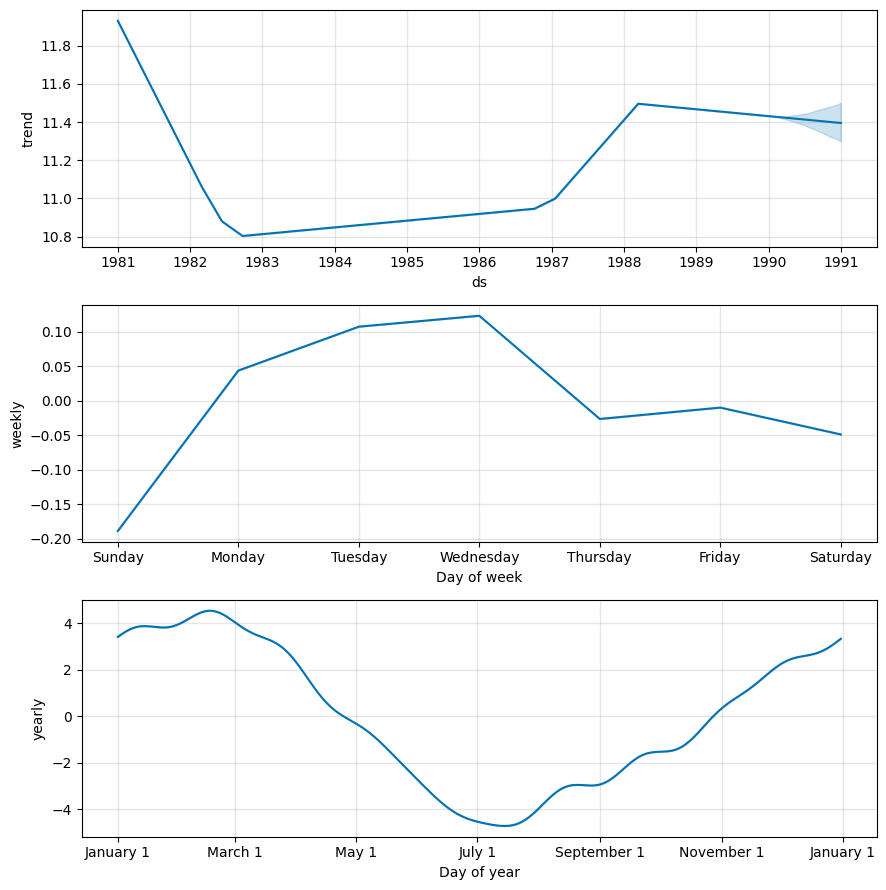

In [20]:
fig2 = m.plot_components(forecast)

plt.savefig('figures/CH19_F05_peixeiro.png', dpi=300)

#### Show trend changepoints 

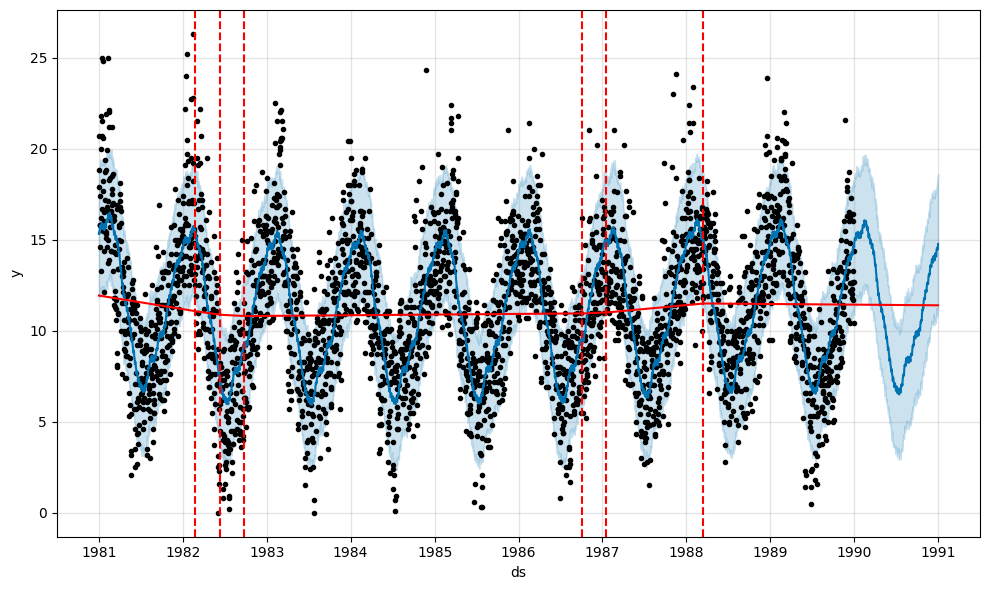

In [21]:
from prophet.plot import add_changepoints_to_plot

fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)

plt.savefig('figures/CH19_F08_peixeiro.png', dpi=300)

#### Plot seasonal components 

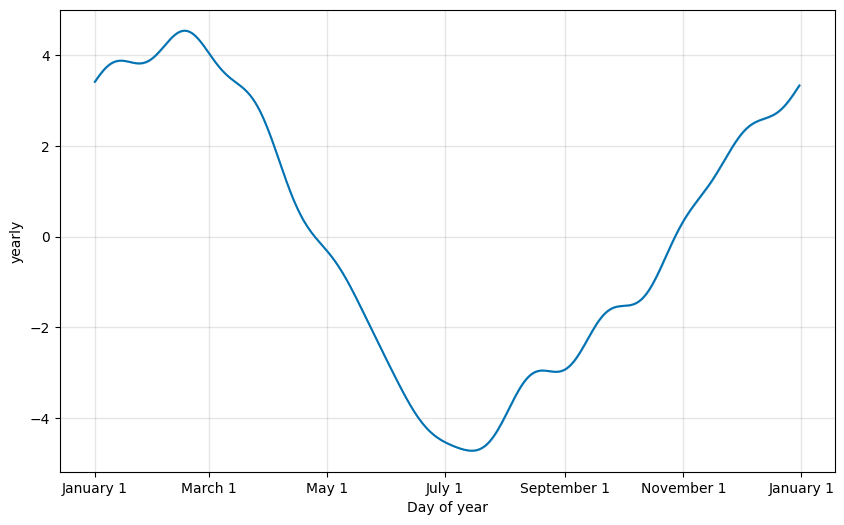

In [22]:
from prophet.plot import plot_yearly, plot_weekly

fig4 = plot_yearly(m)

plt.savefig('figures/CH19_F06_peixeiro.png', dpi=300)

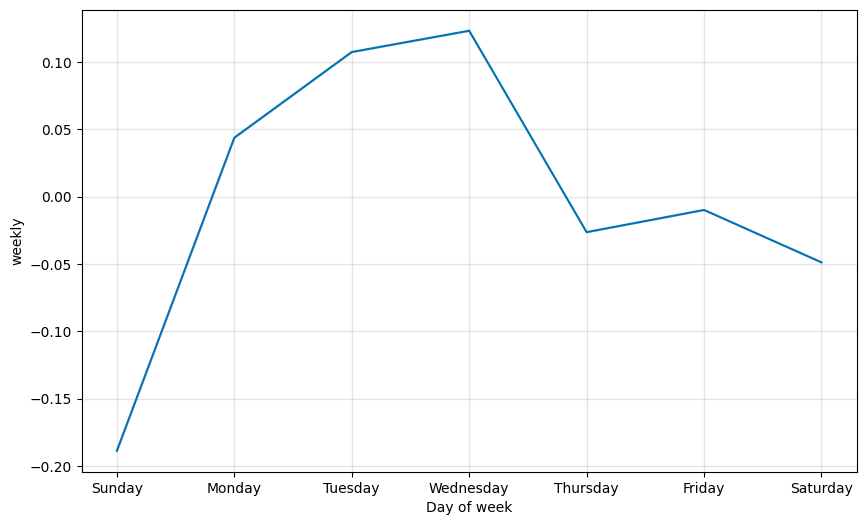

In [23]:
fig5 = plot_weekly(m)

01:22:51 - cmdstanpy - INFO - Chain [1] start processing
01:22:52 - cmdstanpy - INFO - Chain [1] done processing


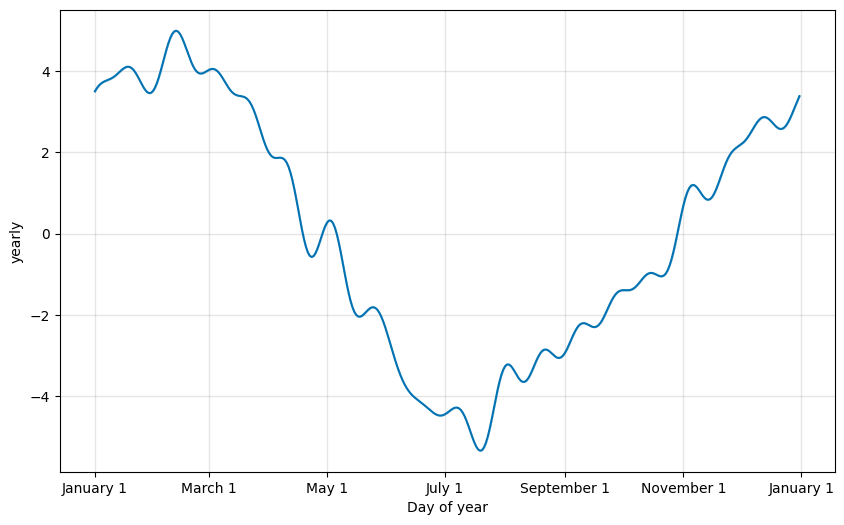

In [24]:
m2 = Prophet(yearly_seasonality=20).fit(train)

fig6 = plot_yearly(m2)

plt.savefig('figures/CH19_F07_peixeiro.png', dpi=300)

### 19.4.2 Cross-validation and performance metrics

In [25]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')

df_cv.head()

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
01:22:53 - cmdstanpy - INFO - Chain [1] start processing
01:22:53 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
01:22:53 - cmdstanpy - INFO - Chain [1] start processing
01:22:53 - cmdstanpy - INFO - Chain [1] done processing
01:22:53 - cmdstanpy - INFO - Chain [1] done processing
01:22:53 - cmdstanpy - INFO - Chain [1] start processing
01:22:53 - cmdstanpy - INFO - Chain [1] done processing
01:22:54 - cmdstanpy - INFO - Chain [1] done processing
01:22:54 - cmdstanpy - INFO - Chain [1] start processing
01:22:54 - cmdstanpy - INFO - Chain [1] done processing
01:22:54 - cmdstanpy - INFO - Chain [1] start processing
01:22:54 - cmdstanpy - INFO - Chain [1] start processing
01:22:54 - cmdstanpy - INFO - Chain [1] start processing
01:22:54 - cmdstanpy - INFO - Ch

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-02,15.146419,11.480306,18.446960,17.3,1983-02-01
1,1983-02-03,14.807844,11.351062,18.515638,13.0,1983-02-01
2,1983-02-04,15.202941,11.829710,18.901514,16.0,1983-02-01
3,1983-02-05,15.194081,11.966374,18.948093,14.9,1983-02-01
4,1983-02-06,15.241056,11.754110,18.944057,16.2,1983-02-01


In [26]:
from prophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv, rolling_window=0)

df_perf.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,1 days,6.367026,2.523297,2.073713,0.148167,0.198386,0.846154
1,2 days,4.676206,2.162454,1.747282,0.139065,0.161589,0.846154
2,3 days,10.018074,3.165134,2.660951,0.147261,0.371936,0.769231
3,4 days,8.667883,2.944127,2.376461,0.196369,0.328992,0.769231
4,5 days,8.237234,2.870058,2.570261,0.195971,0.301180,0.692308


In [27]:
# from prophet.plot import plot_cross_validation_metric

# fig7 = plot_cross_validation_metric(df_cv, metric='mae')

# plt.savefig('figures/CH19_F10_peixeiro.png', dpi=300)

In the above code, there is a compatibility issue between a newer version of pandas and Prophet. The .view() method was removed from pandas Series in pandas 2.0+, but Prophet hasn't been updated to handle this. Instead, see below code

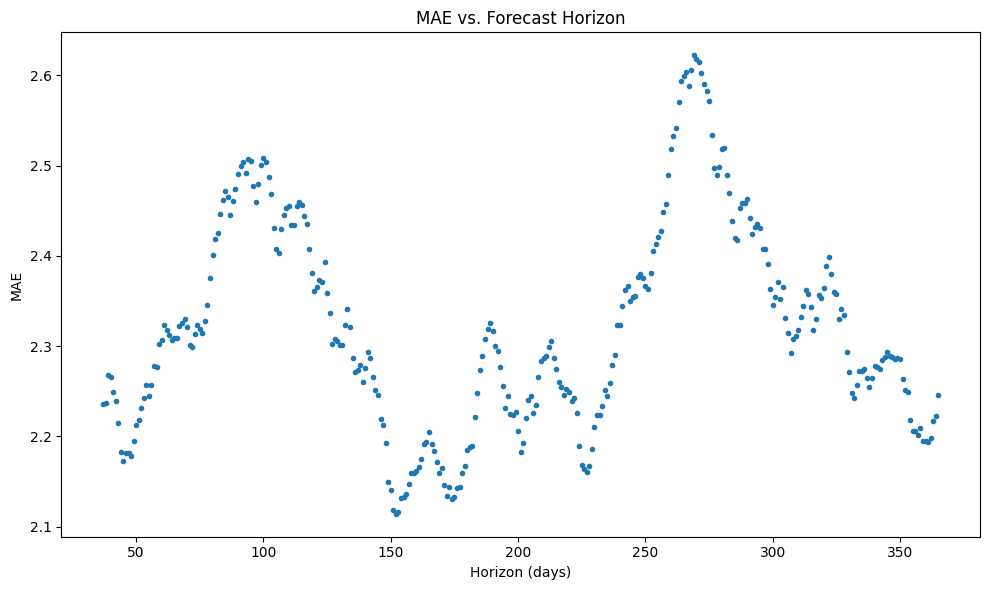

In [28]:
from prophet.diagnostics import performance_metrics
import matplotlib.pyplot as plt

df_p = performance_metrics(df_cv, rolling_window=0.1)

fig7, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_p['horizon'].dt.days, df_p['mae'], '.')
ax.set_xlabel('Horizon (days)')
ax.set_ylabel('MAE')
ax.set_title('MAE vs. Forecast Horizon')
plt.tight_layout()

### 19.4.3 Hyperparameter tuning 

In [29]:
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

maes = []

for params in all_params:
    m = Prophet(**params).fit(train)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes

tuning_results

01:22:56 - cmdstanpy - INFO - Chain [1] start processing
01:22:56 - cmdstanpy - INFO - Chain [1] done processing
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
01:22:57 - cmdstanpy - INFO - Chain [1] start processing
01:22:57 - cmdstanpy - INFO - Chain [1] start processing
01:22:57 - cmdstanpy - INFO - Chain [1] done processing
01:22:57 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:22:57 - cmdstanpy - INFO - Chain [1] done processing
01:22:57 - cmdstanpy - INFO - Chain [1] start processing
01:22:57 - cmdstanpy - INFO - Chain [1] start processing
01:22:57 - cmdstanpy - INFO - Chain [1] done processing
01:22:58 - cmdstanpy - INFO - Chain [1] start processing
01:22:58 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
01:2

,changepoint_prior_scale,seasonality_prior_scale,mae
0,0.001,0.01,2.310861
1,0.001,0.10,2.309828
2,0.001,1.00,2.342244
3,0.001,10.00,2.340331
4,0.010,0.01,2.241959
5,0.010,0.10,2.277179
6,0.010,1.00,2.283006
7,0.010,10.00,2.280156
8,0.100,0.01,2.720188
9,0.100,0.10,2.346684


In [30]:
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


## 19.5 Implementing a robust forecasting process with Prophet 

### 19.5.1 Forecasting project: Predicting the popularity of "chocolate" searches on Google 

Source: https://trends.google.com/trends/explore?date=all&geo=US&q=chocolate

In [3]:
df = pd.read_csv('../data/monthly_chocolate_search_usa.csv')
df.head()

,month,chocolate
0,2004-01,35
1,2004-02,48
2,2004-03,34
3,2004-04,33
4,2004-05,33


In [32]:
df.tail()

,month,chocolate
211,2021-08,45
212,2021-09,45
213,2021-10,44
214,2021-11,54
215,2021-12,74


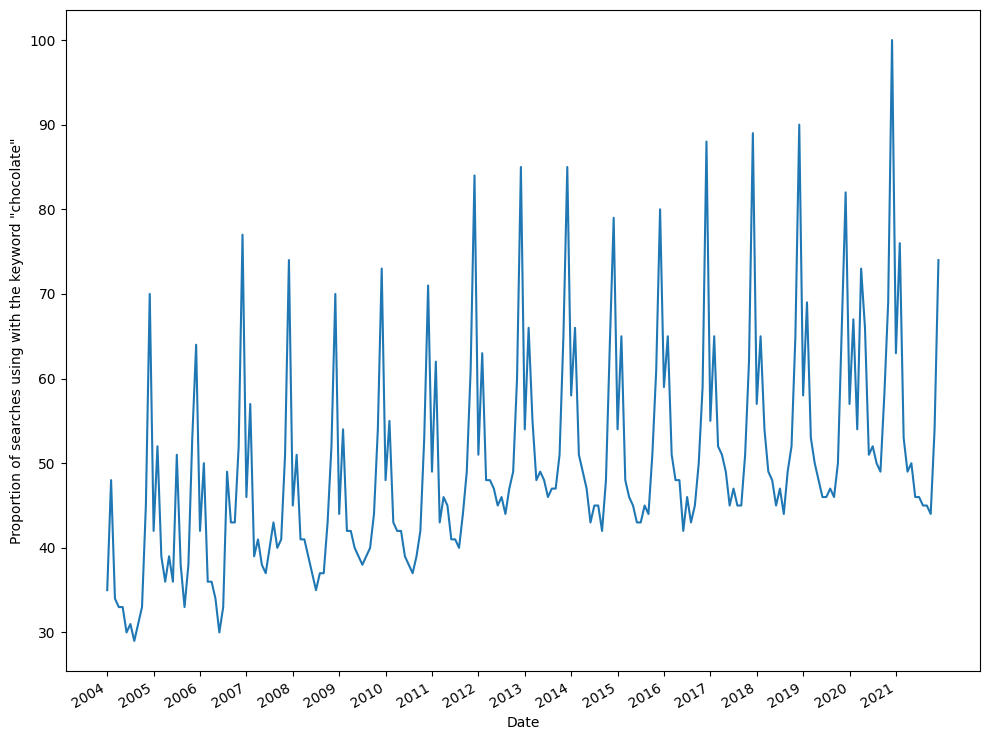

In [33]:
fig, ax = plt.subplots()

ax.plot(df['chocolate'])
ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F13_peixeiro.png', dpi=300)

In [4]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2004-01,35
1,2004-02,48
2,2004-03,34
3,2004-04,33
4,2004-05,33


In [5]:
from pandas.tseries.offsets import MonthEnd

df['ds'] = pd.to_datetime(df['ds']) + MonthEnd(1)

df.head()

,ds,y
0,2004-01-31,35
1,2004-02-29,48
2,2004-03-31,34
3,2004-04-30,33
4,2004-05-31,33


In [6]:
train = df[:-12]
test = df[-12:]

In [37]:
train.tail()

,ds,y
199,2020-08-31,50
200,2020-09-30,49
201,2020-10-31,58
202,2020-11-30,69
203,2020-12-31,100


In [38]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

#cutoffs = pd.date_range(start='2009-01-31', end='2020-01-31', freq='12ME')
# The error means your last cutoff (2020-01-31) plus the horizon (365 days) exceeds the end of your training data. 
# Prophet needs data beyond the last cutoff to evaluate predictions against.
cutoffs = pd.date_range(start='2008-12-31', end='2019-12-31', freq='12ME')          # freq='12ME' instead of freq='12M'

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

01:23:54 - cmdstanpy - INFO - Chain [1] start processing
01:23:54 - cmdstanpy - INFO - Chain [1] done processing
01:23:54 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:54 - cmdstanpy - INFO - Chain [1] start processing
01:23:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/12 [00:00<?, ?it/s]

01:23:54 - cmdstanpy - INFO - Chain [1] start processing
01:23:54 - cmdstanpy - INFO - Chain [1] done processing
01:23:54 - cmdstanpy - INFO - Chain [1] start processing
01:23:55 - cmdstanpy - INFO - Chain [1] done processing
01:23:55 - cmdstanpy - INFO - Chain [1] start processing
01:23:55 - cmdstanpy - INFO - Chain [1] done processing
01:23:55 - cmdstanpy - INFO - Chain [1] start processing
01:23:55 - cmdstanpy - INFO - Chain [1] done processing
01:23:56 - cmdstanpy - INFO - Chain [1] start processing
01:23:56 - cmdstanpy - INFO - Chain [1] done processing
01:23:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:56 - cmdstanpy - INFO - Chain [1] start processing
01:23:56 - cmdstanpy - INFO - Chain [1] done processing
01:23:56 - cmdstanpy - INFO - Chain [1] start processing
01:23:56 - cmdstanpy - INFO - Chain [1] done processing
01:23:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation n

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:00 - cmdstanpy - INFO - Chain [1] start processing
01:24:01 - cmdstanpy - INFO - Chain [1] done processing
01:24:01 - cmdstanpy - INFO - Chain [1] start processing
01:24:01 - cmdstanpy - INFO - Chain [1] done processing
01:24:01 - cmdstanpy - INFO - Chain [1] start processing
01:24:01 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation n

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:06 - cmdstanpy - INFO - Chain [1] start processing
01:24:06 - cmdstanpy - INFO - Chain [1] done processing
01:24:06 - cmdstanpy - INFO - Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing
01:24:07 - cmdstanpy - INFO - Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing
01:24:07 - cmdstanpy - INFO - Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation n

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:12 - cmdstanpy - INFO - Chain [1] start processing
01:24:12 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing
01:24:13 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing
01:24:13 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing
01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - INFO - Chain [1] start processing
01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:14 - cmdstanpy - INFO - Chain [1] start processing
01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - INFO - Chain [1] start processing
01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation n

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:18 - cmdstanpy - INFO - Chain [1] start processing
01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:18 - cmdstanpy - INFO - Chain [1] start processing
01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:18 - cmdstanpy - INFO - Chain [1] start processing
01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:20 - cmdstanpy - INFO - Chain [1] start processing
01:24:20 - 

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:21 - cmdstanpy - INFO - Chain [1] start processing
01:24:21 - cmdstanpy - INFO - Chain [1] done processing
01:24:21 - cmdstanpy - INFO - Chain [1] start processing
01:24:21 - cmdstanpy - INFO - Chain [1] done processing
01:24:21 - cmdstanpy - INFO - Chain [1] start processing
01:24:21 - cmdstanpy - INFO - Chain [1] done processing
01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:22 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:23 - cmdstanpy - INFO - Chain [1] start processing
01:24:23 - 

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:24 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:24 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:25 - cmdstanpy - INFO - Chain [1] done processing
01:24:25 - cmdstanpy - INFO - Chain [1] start processing
01:24:25 - cmdstanpy - INFO - Chain [1] done processing
01:24:25 - cmdstanpy - INFO - Chain [1] start processing
01:24:25 - cmdstanpy - INFO - Chain [1] done processing
01:24:25 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:25 - cmdstanpy - INFO - Chain [1] start processing
01:24:26 - cmdstanpy - INFO - Chain [1] done processing
01:24:26 - cmdstanpy - INFO - Chain [1] start processing
01:24:26 - cmdstanpy - INFO - Chain [1] done processing
01:24:26 - cmdstanpy - INFO - Chain [1] start processing
01:24:26 - 

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:27 - cmdstanpy - INFO - Chain [1] start processing
01:24:27 - cmdstanpy - INFO - Chain [1] done processing
01:24:27 - cmdstanpy - INFO - Chain [1] start processing
01:24:27 - cmdstanpy - INFO - Chain [1] done processing
01:24:27 - cmdstanpy - INFO - Chain [1] start processing
01:24:28 - cmdstanpy - INFO - Chain [1] done processing
01:24:28 - cmdstanpy - INFO - Chain [1] start processing
01:24:28 - cmdstanpy - INFO - Chain [1] done processing
01:24:28 - cmdstanpy - INFO - Chain [1] start processing
01:24:28 - cmdstanpy - INFO - Chain [1] done processing
01:24:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:28 - cmdstanpy - INFO - Chain [1] start processing
01:24:29 - cmdstanpy - INFO - Chain [1] done processing
01:24:29 - cmdstanpy - INFO - Chain [1] start processing
01:24:29 - cmdstanpy - INFO - Chain [1] done processing
01:24:29 - cmdstanpy - INFO - Chain [1] start processing
01:24:29 - 

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:30 - cmdstanpy - INFO - Chain [1] start processing
01:24:30 - cmdstanpy - INFO - Chain [1] done processing
01:24:30 - cmdstanpy - INFO - Chain [1] start processing
01:24:31 - cmdstanpy - INFO - Chain [1] done processing
01:24:31 - cmdstanpy - INFO - Chain [1] start processing
01:24:31 - cmdstanpy - INFO - Chain [1] done processing
01:24:31 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1] done processing
01:24:32 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1] done processing
01:24:32 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1] done processing
01:24:32 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1] done processing
01:24:32 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1] done processing
01:24:32 - cmdstanpy - INFO - Chain [1] start processing
01:24:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:33 - cmdstanpy - INFO - Chain [1] start processing
01:24:33 - cmdstanpy - INFO - Chain [1] done processing
01:24:34 - cmdstanpy - INFO - Chain [1] start processing
01:24:34 - cmdstanpy - INFO - Chain [1] done processing
01:24:34 - cmdstanpy - INFO - Chain [1] start processing
01:24:35 - cmdstanpy - INFO - Chain [1] done processing
01:24:35 - cmdstanpy - INFO - Chain [1] start processing
01:24:35 - cmdstanpy - INFO - Chain [1] done processing
01:24:35 - cmdstanpy - INFO - Chain [1] start processing
01:24:35 - cmdstanpy - INFO - Chain [1] done processing
01:24:36 - cmdstanpy - INFO - Chain [1] start processing
01:24:36 - cmdstanpy - INFO - Chain [1] done processing
01:24:36 - cmdstanpy - INFO - Chain [1] start processing
01:24:36 - cmdstanpy - INFO - Chain [1] done processing
01:24:36 - cmdstanpy - INFO - Chain [1] start processing
01:24:36 - cmdstanpy - INFO - Chain [1] done processing
01:24:36 - cmdstanpy - INFO - Chain [1] start processing
01:24:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:37 - cmdstanpy - INFO - Chain [1] start processing
01:24:37 - cmdstanpy - INFO - Chain [1] done processing
01:24:37 - cmdstanpy - INFO - Chain [1] start processing
01:24:38 - cmdstanpy - INFO - Chain [1] done processing
01:24:38 - cmdstanpy - INFO - Chain [1] start processing
01:24:38 - cmdstanpy - INFO - Chain [1] done processing
01:24:39 - cmdstanpy - INFO - Chain [1] start processing
01:24:39 - cmdstanpy - INFO - Chain [1] done processing
01:24:39 - cmdstanpy - INFO - Chain [1] start processing
01:24:39 - cmdstanpy - INFO - Chain [1] done processing
01:24:39 - cmdstanpy - INFO - Chain [1] start processing
01:24:39 - cmdstanpy - INFO - Chain [1] done processing
01:24:39 - cmdstanpy - INFO - Chain [1] start processing
01:24:39 - cmdstanpy - INFO - Chain [1] done processing
01:24:39 - cmdstanpy - INFO - Chain [1] start processing
01:24:40 - cmdstanpy - INFO - Chain [1] done processing
01:24:40 - cmdstanpy - INFO - Chain [1] start processing
01:24:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:40 - cmdstanpy - INFO - Chain [1] start processing
01:24:41 - cmdstanpy - INFO - Chain [1] done processing
01:24:41 - cmdstanpy - INFO - Chain [1] start processing
01:24:41 - cmdstanpy - INFO - Chain [1] done processing
01:24:41 - cmdstanpy - INFO - Chain [1] start processing
01:24:42 - cmdstanpy - INFO - Chain [1] done processing
01:24:42 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:44 - cmdstanpy - INFO - Chain [1] start processing
01:24:44 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:46 - cmdstanpy - INFO - Chain [1] start processing
01:24:46 - cmdstanpy - INFO - Chain [1] done processing
01:24:46 - cmdstanpy - INFO - Chain [1] start processing
01:24:46 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - INFO - Chain [1] start processing
01:24:47 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - INFO - Chain [1] start processing
01:24:47 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - INFO - Chain [1] start processing
01:24:47 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - INFO - Chain [1] start processing
01:24:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:48 - cmdstanpy - INFO - Chain [1] start processing
01:24:48 - cmdstanpy - INFO - Chain [1] done processing
01:24:48 - cmdstanpy - INFO - Chain [1] start processing
01:24:49 - cmdstanpy - INFO - Chain [1] done processing
01:24:49 - cmdstanpy - INFO - Chain [1] start processing
01:24:50 - cmdstanpy - INFO - Chain [1] done processing
01:24:50 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1] done processing
01:24:51 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1] done processing
01:24:51 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1] done processing
01:24:51 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1] done processing
01:24:51 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1] done processing
01:24:51 - cmdstanpy - INFO - Chain [1] start processing
01:24:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:52 - cmdstanpy - INFO - Chain [1] start processing
01:24:53 - cmdstanpy - INFO - Chain [1] done processing
01:24:53 - cmdstanpy - INFO - Chain [1] start processing
01:24:54 - cmdstanpy - INFO - Chain [1] done processing
01:24:54 - cmdstanpy - INFO - Chain [1] start processing
01:24:55 - cmdstanpy - INFO - Chain [1] done processing
01:24:55 - cmdstanpy - INFO - Chain [1] start processing
01:24:55 - cmdstanpy - INFO - Chain [1] done processing
01:24:55 - cmdstanpy - INFO - Chain [1] start processing
01:24:55 - cmdstanpy - INFO - Chain [1] done processing
01:24:56 - cmdstanpy - INFO - Chain [1] start processing
01:24:56 - cmdstanpy - INFO - Chain [1] done processing
01:24:56 - cmdstanpy - INFO - Chain [1] start processing
01:24:56 - cmdstanpy - INFO - Chain [1] done processing
01:24:56 - cmdstanpy - INFO - Chain [1] start processing
01:24:56 - cmdstanpy - INFO - Chain [1] done processing
01:24:56 - cmdstanpy - INFO - Chain [1] start processing
01:24:56 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

01:24:57 - cmdstanpy - INFO - Chain [1] start processing
01:24:58 - cmdstanpy - INFO - Chain [1] done processing
01:24:58 - cmdstanpy - INFO - Chain [1] start processing
01:24:58 - cmdstanpy - INFO - Chain [1] done processing
01:24:58 - cmdstanpy - INFO - Chain [1] start processing
01:24:59 - cmdstanpy - INFO - Chain [1] done processing
01:24:59 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1] done processing
01:25:00 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1] done processing
01:25:00 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1] done processing
01:25:00 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1] done processing
01:25:00 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1] done processing
01:25:00 - cmdstanpy - INFO - Chain [1] start processing
01:25:00 - cmdstanpy - INFO - Chain [1]

In [39]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}


In [40]:
m = Prophet(**best_params)
m.add_country_holidays(country_name='US')
m.fit(train);

01:25:01 - cmdstanpy - INFO - Chain [1] start processing
01:25:01 - cmdstanpy - INFO - Chain [1] done processing
01:25:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:25:01 - cmdstanpy - INFO - Chain [1] start processing
01:25:02 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=12, freq='ME')  # freq='ME' instead of freq='M'

In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
204,2021-01-31,60.737181,55.924215,65.471032
205,2021-02-28,69.899815,65.310284,74.581766
206,2021-03-31,56.230187,51.837277,60.589973
207,2021-04-30,56.195597,51.810063,60.761449
208,2021-05-31,53.494828,48.918983,58.179032
209,2021-06-30,51.205318,46.879995,55.694609
210,2021-07-31,52.962890,48.316351,57.150556
211,2021-08-31,52.553347,48.192329,57.140099
212,2021-09-30,52.646369,48.261425,57.041299
213,2021-10-31,56.950022,52.480384,61.531833


In [43]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
204,2021-01-31,63,60.737181,55.924215,65.471032
205,2021-02-28,76,69.899815,65.310284,74.581766
206,2021-03-31,53,56.230187,51.837277,60.589973
207,2021-04-30,49,56.195597,51.810063,60.761449
208,2021-05-31,50,53.494828,48.918983,58.179032


In [44]:
test['baseline'] = train['y'][-12:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
204,2021-01-31,63,60.737181,55.924215,65.471032,57
205,2021-02-28,76,69.899815,65.310284,74.581766,67
206,2021-03-31,53,56.230187,51.837277,60.589973,54
207,2021-04-30,49,56.195597,51.810063,60.761449,73
208,2021-05-31,50,53.494828,48.918983,58.179032,66


In [45]:
prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

7.464803190067831
10.916666666666666


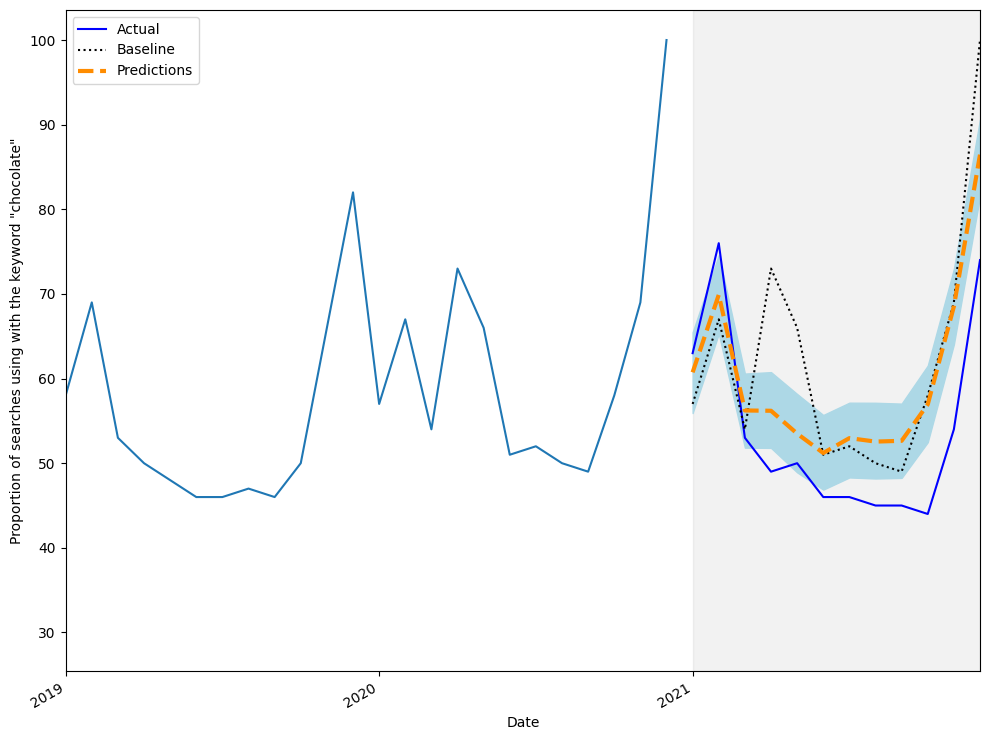

In [46]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['baseline'], 'k:', label='Baseline')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

ax.axvspan(204, 215, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(180, 215)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F15_peixeiro.png', dpi=300)

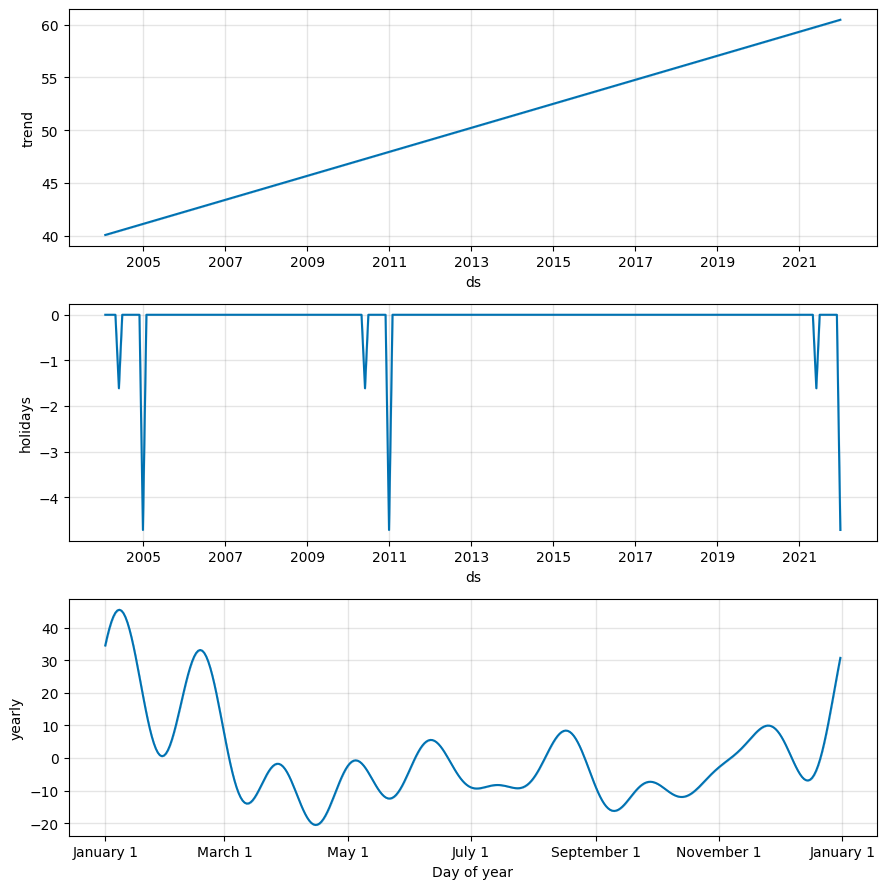

In [47]:
prophet_components_fig = m.plot_components(forecast)

plt.savefig('figures/CH19_F16_peixeiro.png', dpi=300)

### 19.5.2 Experiment: Can SARIMA do better? 

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import notebook           # tqdm command import updated
from itertools import product
from typing import Union

In [49]:
ad_fuller_result = adfuller(df['y'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.0341743396012655
p-value: 0.27179271331668664


In [50]:
y_diff = np.diff(df['y'], n=1)

ad_fuller_result = adfuller(y_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.0347105051021925
p-value: 6.058003360042041e-10


$d=1$, $D=0$ and $m=12$

In [51]:
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in notebook.tqdm(order_list):     # tqdm command updated
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [52]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

order_list = list(product(ps, qs, Ps, Qs))

d = 1
D = 0
s = 12

In [ ]:
# SARIMA_result_df = optimize_SARIMAX(train['y'], None, order_list, d, D, s)
# SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

/home/minty/Repos/z3.12/z12_uv_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/minty/Repos/z3.12/z12_uv_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/minty/Repos/z3.12/z12_uv_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/minty/Repos/z3.12/z12_uv_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/minty/Repo

,"(p,q,P,Q)",AIC
0,"(0, 1, 2, 1)",10.000000
1,"(0, 3, 3, 1)",16.000000
2,"(1, 1, 1, 1)",1127.747666
3,"(1, 2, 1, 1)",1129.312128
4,"(1, 1, 1, 2)",1129.725044
...,...,...
248,"(1, 2, 0, 0)",1570.730422
249,"(2, 1, 0, 0)",1570.732139
250,"(0, 1, 0, 0)",1570.979692
251,"(0, 2, 0, 0)",1571.866177


	    (p,q,P,Q)	AIC  
0	(0, 1, 2, 1)	10.000000  
1	(0, 3, 3, 1)	16.000000  
2	(1, 1, 1, 1)	1127.747666  
3	(1, 2, 1, 1)	1129.312128  
4	(1, 1, 1, 2)	1129.725044  
...	...	...
248	(1, 2, 0, 0)	1570.730422  
249	(2, 1, 0, 0)	1570.732139  
250	(0, 1, 0, 0)	1570.979692  
251	(0, 2, 0, 0)	1571.866177  
252	(0, 0, 0, 0)	1596.954153  

In [17]:
SARIMA_model = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -558.874
Date:                            Fri, 20 Feb 2026   AIC                           1127.748
Time:                                    09:05:50   BIC                           1144.314
Sample:                                         0   HQIC                          1134.450
                                            - 204                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3592      0.090      3.999      0.000       0.183       0.535
ma.L1         -0.8948      0.059   

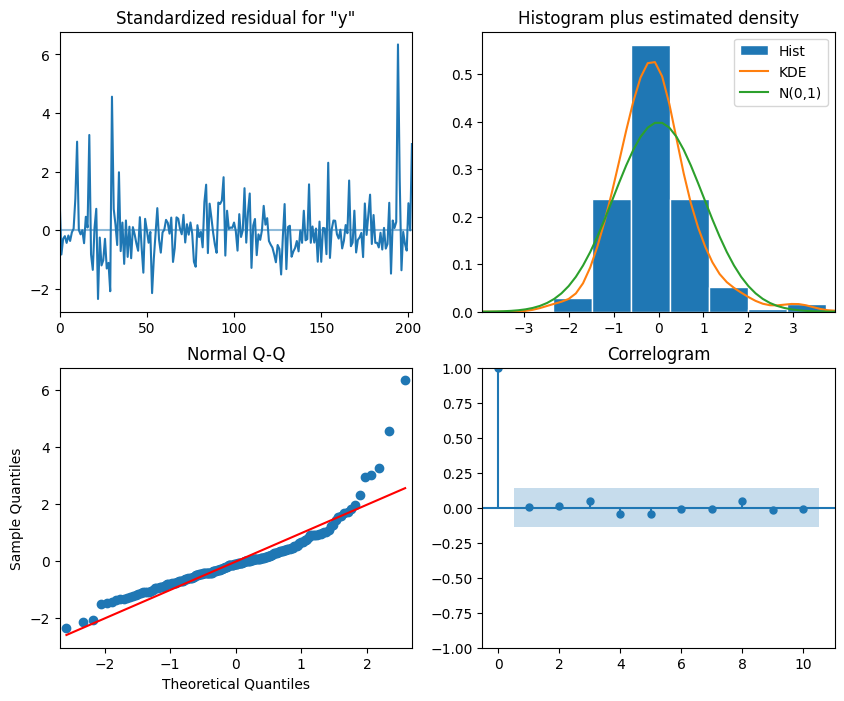

In [18]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH19_F17_peixeiro.png', dpi=300)

In [ ]:
# residuals = SARIMA_model_fit.resid

# lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

# print(pvalue)

lb_pvalue


: 

In [19]:
residuals = SARIMA_model_fit.resid
lb_dataframe = acorr_ljungbox(residuals, np.arange(1, 11, 1))
lb_dataframe

,lb_stat,lb_pvalue
1,4.046685,0.044258
2,4.799897,0.090723
3,4.813294,0.185990
4,5.534628,0.236702
5,6.814407,0.234813
6,7.316126,0.292599
7,7.324114,0.395931
8,7.416325,0.492451
9,8.237925,0.510359
10,12.346966,0.262506


In [20]:
test

,ds,y
204,2021-01-31,63
205,2021-02-28,76
206,2021-03-31,53
207,2021-04-30,49
208,2021-05-31,50
209,2021-06-30,46
210,2021-07-31,46
211,2021-08-31,45
212,2021-09-30,45
213,2021-10-31,44


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(204, 215).predicted_mean

test['SARIMA_pred'] = SARIMA_pred

test

,ds,y,yhat,yhat_lower,yhat_upper,baseline,SARIMA_pred
204,2021-01-31,63,60.737181,55.924215,65.471032,57,66.615558
205,2021-02-28,76,69.899815,65.310284,74.581766,67,74.226584
206,2021-03-31,53,56.230187,51.837277,60.589973,54,59.761825
207,2021-04-30,49,56.195597,51.810063,60.761449,73,60.502562
208,2021-05-31,50,53.494828,48.918983,58.179032,66,58.449975
209,2021-06-30,46,51.205318,46.879995,55.694609,51,53.697222
210,2021-07-31,46,52.962890,48.316351,57.150556,52,54.979215
211,2021-08-31,45,52.553347,48.192329,57.140099,50,54.284868
212,2021-09-30,45,52.646369,48.261425,57.041299,49,54.567510
213,2021-10-31,44,56.950022,52.480384,61.531833,58,59.529541


: 

: 

: 

In [ ]:
SARIMA_mae = mean_absolute_error(test['y'], test['SARIMA_pred'])

print(SARIMA_mae)

10.072565470534553


: 

: 

: 

In [ ]:
end = time.perf_counter()

elapsed_time = end - start
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 650.8065 seconds


: 

: 

: 

Elapsed time: 650.8065 seconds